In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.preprocessing import StandardScaler


In [2]:
def generate_synthetic_data(num_samples):
    # Generate Random Data
    data = {
        'user_id': np.arange(num_samples), 
        'age': np.random.randint(low=21, high=75, size=num_samples),
        'gender': np.random.choice(['M', 'F'], size=num_samples),
        'height': np.random.normal(1.77, .25, size=num_samples), # Metric System
        'weight': np.random.normal(80, 10, size=num_samples), # Metric System
        'tenure': np.random.normal(50, 20, size=num_samples), 
        'month_visit_freq': np.random.poisson(4, num_samples),
        'perscription_adherance': np.random.uniform(size=num_samples),
        'engagement_score': np.random.normal(loc=.5, scale=.25, size=num_samples)
    }
    
    
    # Import into Pandas
    df = pd.DataFrame(data)
    
    df['bmi'] = df['weight']/ df['height']**2
    df['bmi'] = df['bmi'].clip(18, 90)
    
    
    return df

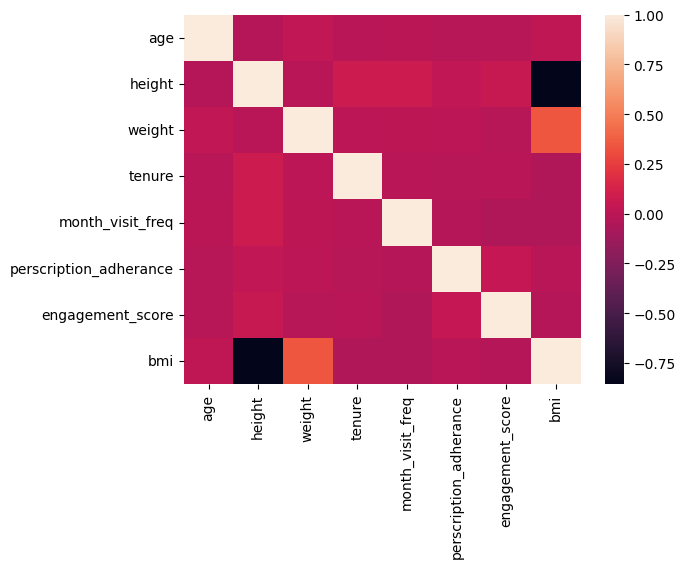

In [4]:
# Generate sample dataframe
df = generate_synthetic_data(1000)

# Track numerical features 
numeric_features = df.columns.drop(['gender', 'user_id'])

# Plot Initial Correlations
sns.heatmap(df[numeric_features].corr())

# Separate features
feat, target = numeric_features.drop(['engagement_score']), ['engagement_score']

** Checking for multicollinearity **

In [5]:
df[numeric_features].corr()

age    height    weight    tenure  \
age                     1.000000 -0.032359  0.026094 -0.008536   
height                 -0.032359  1.000000 -0.008214  0.073631   
weight                  0.026094 -0.008214  1.000000  0.004123   
tenure                 -0.008536  0.073631  0.004123  1.000000   
month_visit_freq       -0.001413  0.073684  0.009719 -0.011855   
perscription_adherance -0.019975  0.022667  0.004463 -0.018895   
engagement_score       -0.019449  0.055744 -0.017925 -0.013151   
bmi                     0.019806 -0.856799  0.340387 -0.053785   

                        month_visit_freq  perscription_adherance  \
age                            -0.001413               -0.019975   
height                          0.073684                0.022667   
weight                          0.009719                0.004463   
tenure                         -0.011855               -0.018895   
month_visit_freq                1.000000               -0.036707   
perscription_adherance         -0.036707                1.000000   
engagement_score               -0.047057                0.037159   
bmi                            -0.053181               -0.009586   

                        engagement_score       bmi  
age                            -0.019449  0.019806  
height                          0.055744 -0.856799  
weight                         -0.017925  0.340387  
tenure                         -0.013151 -0.053785  
month_visit_freq               -0.047057 -0.053181  
perscription_adherance          0.037159 -0.009586  
engagement_score                1.000000 -0.036058  
bmi                            -0.036058  1.000000

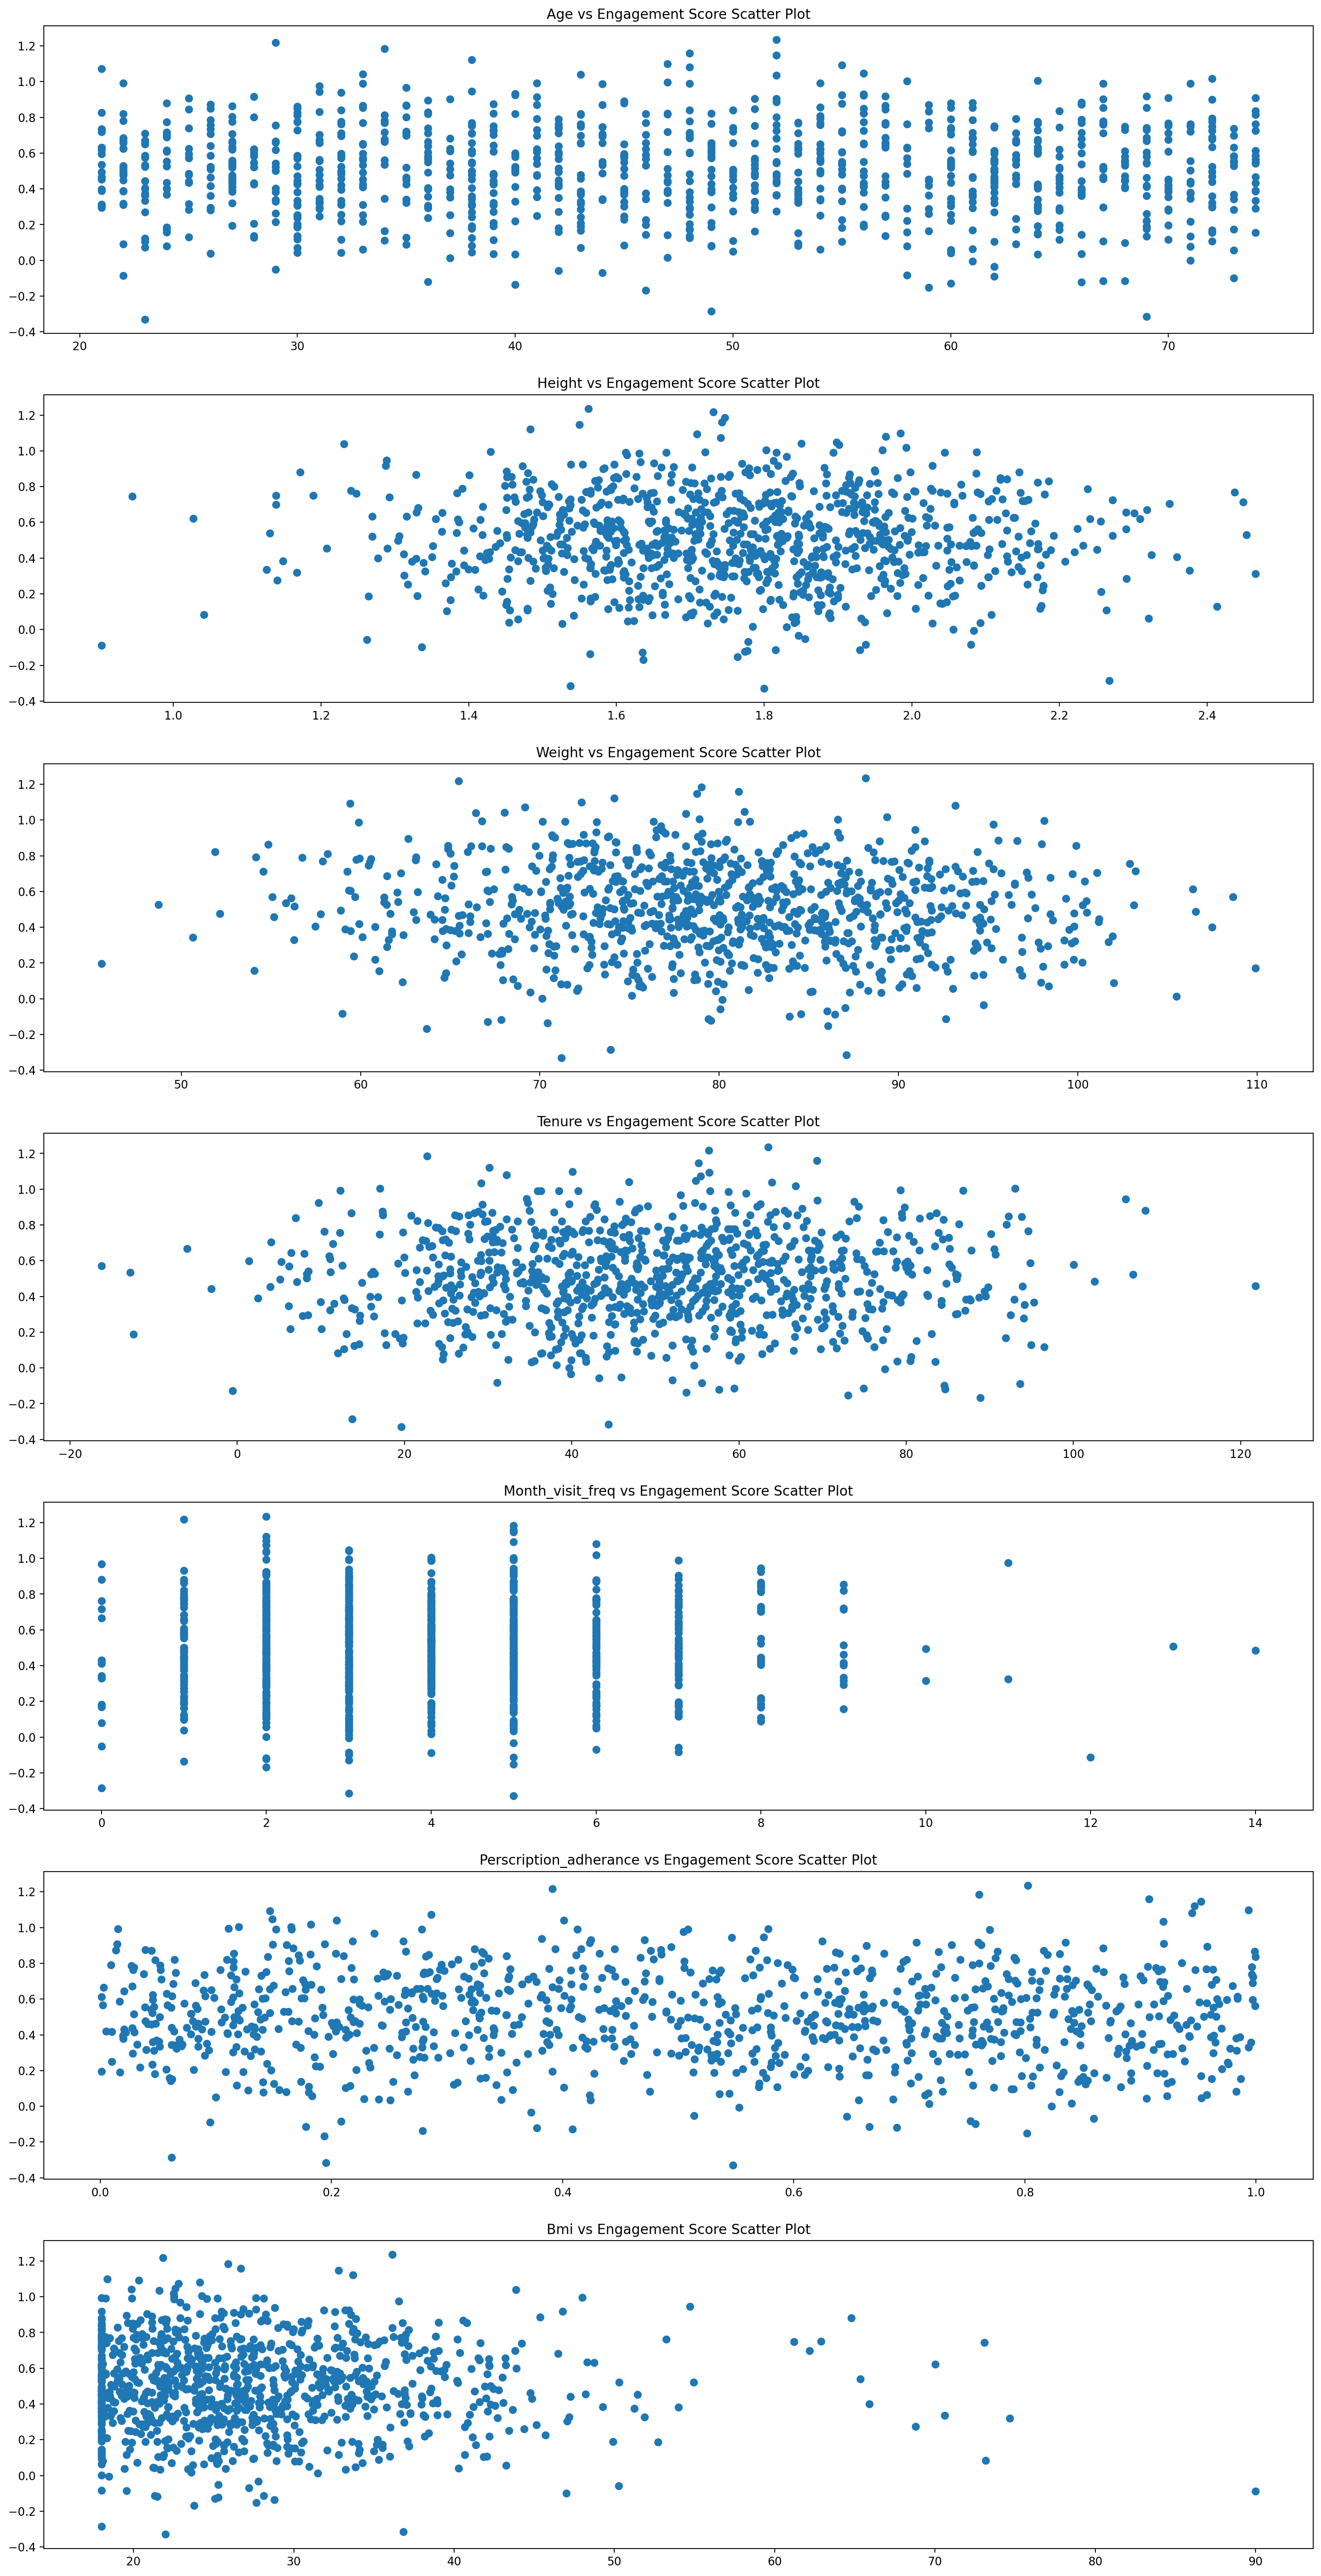

In [98]:
# Create subplot
fig, ax = plt.subplots(nrows=len(feat), figsize=(20, 40), dpi=200)

# Iterate over features
for i, elem in enumerate(feat):
    title = elem.capitalize()
    # Plot relationship with target
    ax[i].scatter(df[elem], df[target])
    ax[i].set_title(f"{title} vs Engagement Score Scatter Plot")

In [106]:
# UDF to categorize age groups
def categorize_age(age):
    if age < 30:
        return 'Young Adult'
    elif age < 40:
        return 'Adult'
    else:
        return 'Senior'

# Define Color mappings
age_colorings = {'Young Adult': 'blue', 
                 'Adult': 'green',
                 'Senior': 'red'}

# Partition age ranges into categorical features
df['age_category'] = df['age'].apply(categorize_age)


df['age_colorings'] = df['age_category'].map(age_colorings)

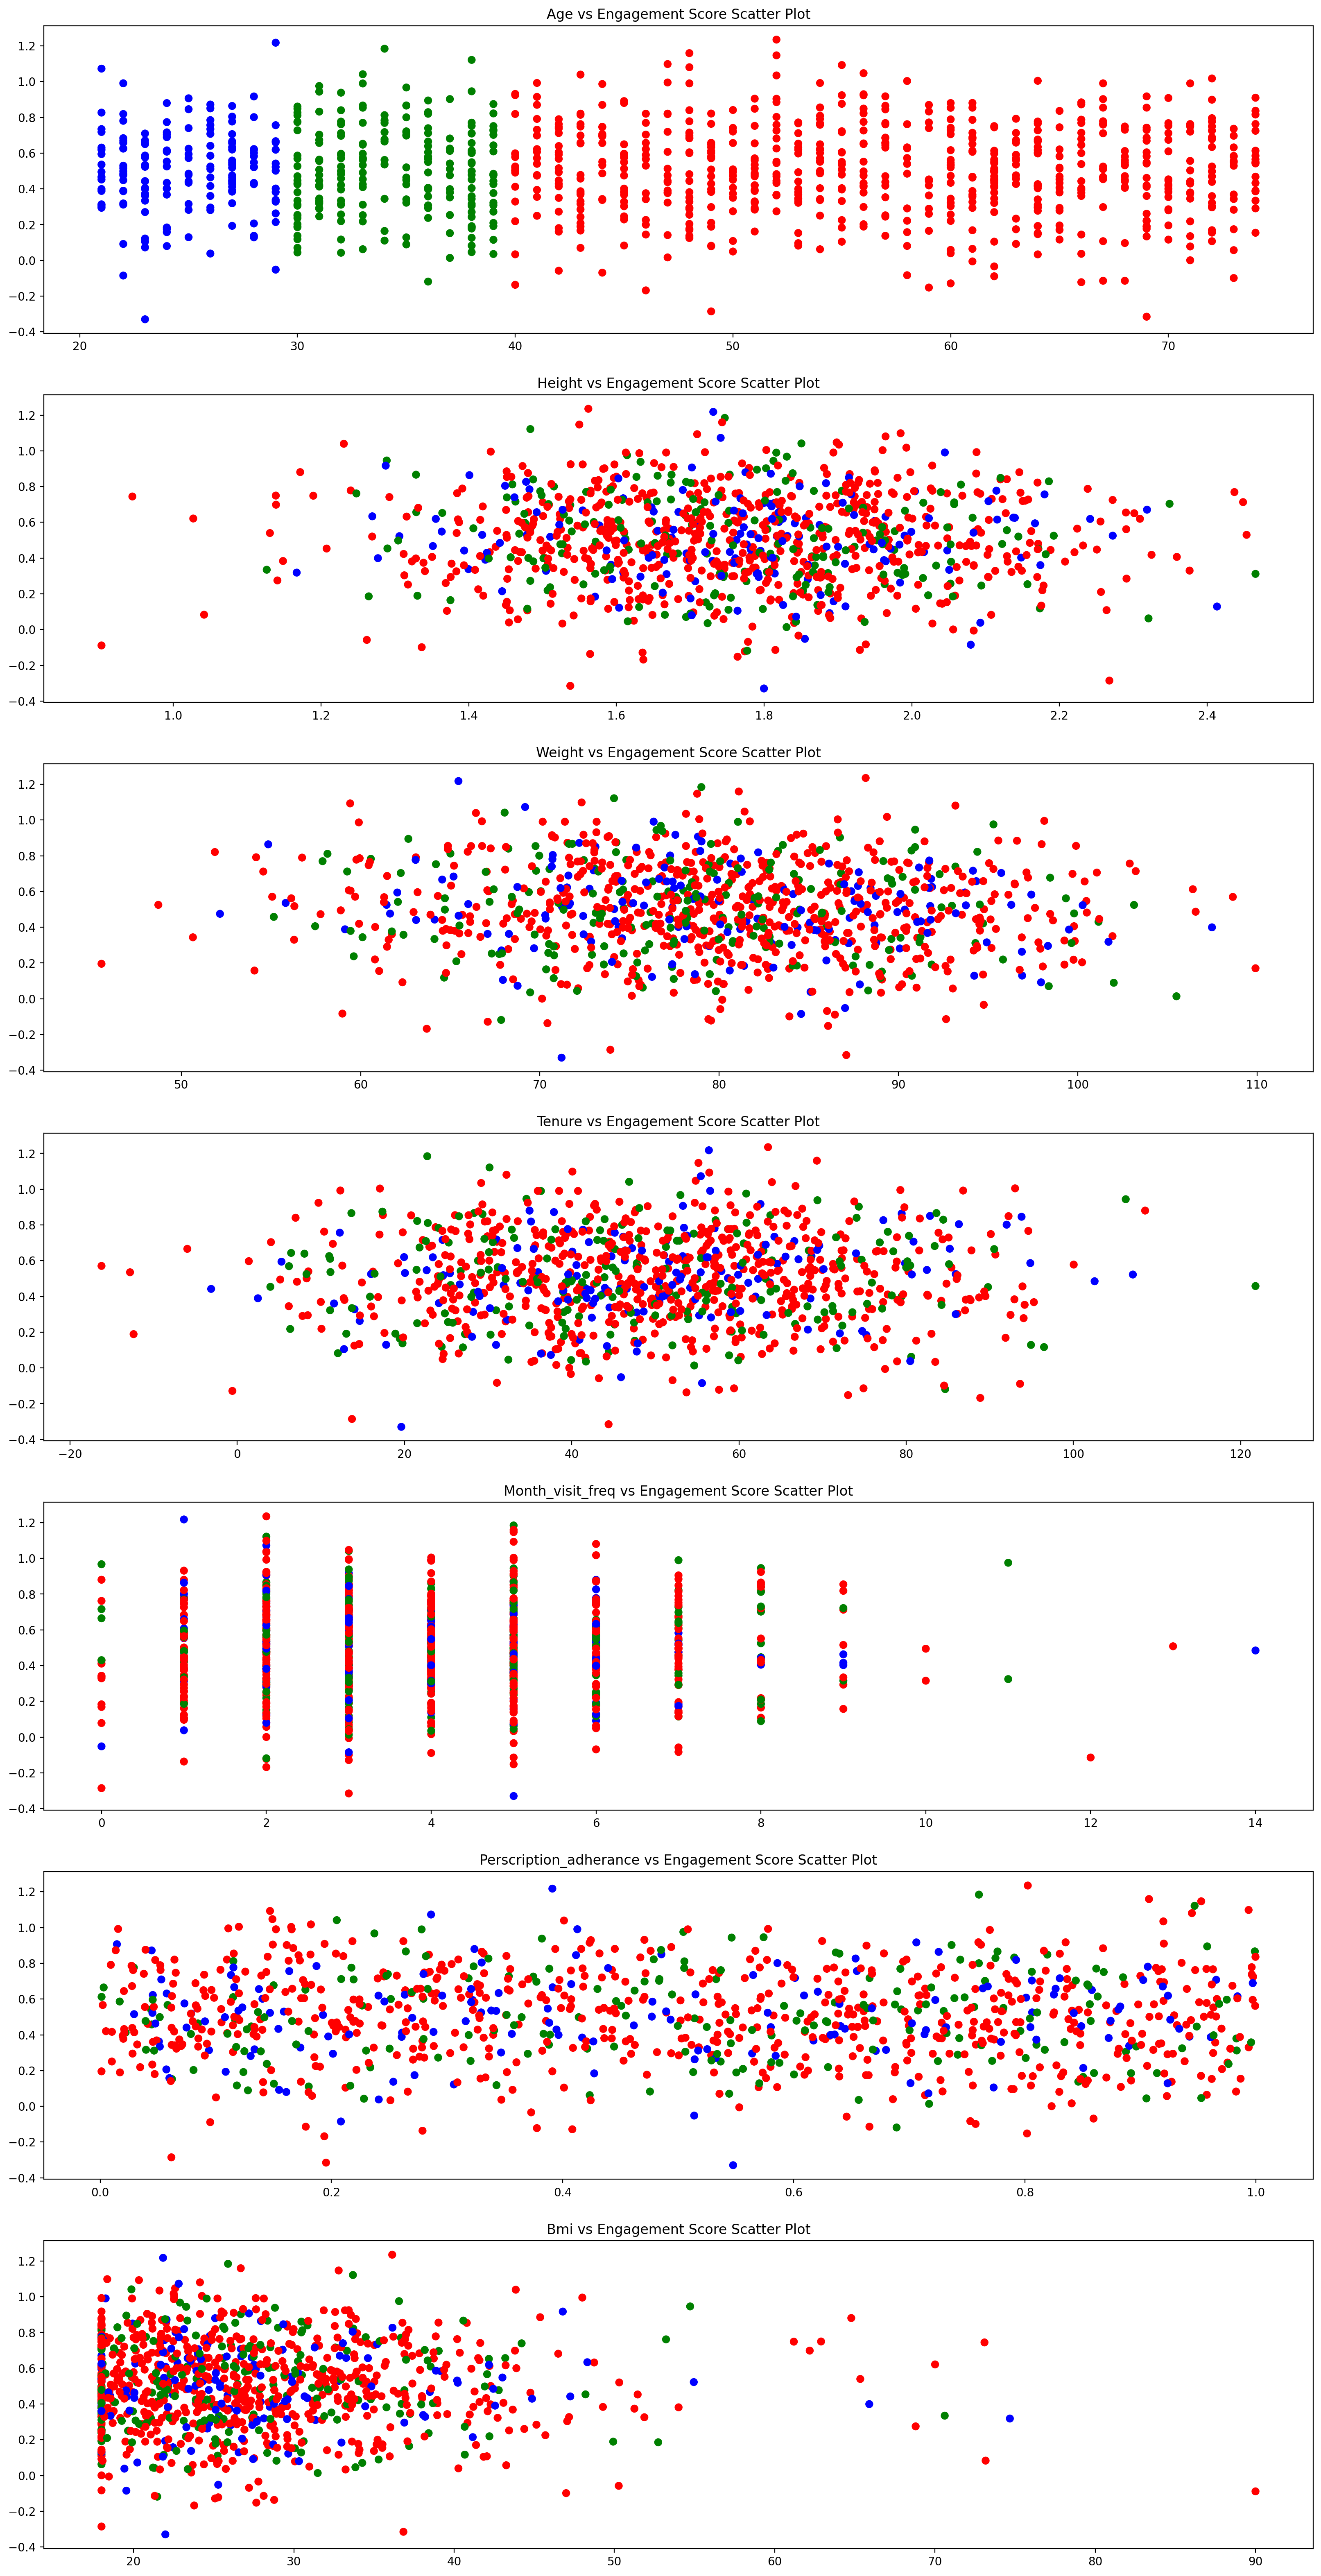

In [109]:
# Re plot feature to target relationship, coloring by age group 
fig, ax = plt.subplots(nrows=len(feat), figsize=(20, 40), dpi=200)

for i, elem in enumerate(feat):
    # set axes
    axes = ax[i]
    
    # clean title
    title = elem.capitalize()
    
    # Plot relationship of pair
    axes.scatter(df[elem], df[target], color=df['age_colorings'])
    
    # Format Plot
    axes.set_title(f"{title} vs Engagement Score Scatter Plot")

In [173]:
# Initialize standardization 
scaler = StandardScaler()

# Stardize features
standardized_feats = scaler.fit_transform(df[list(feat) + ['engagement_score']].to_numpy())

# Add column names 
std_col_names = [col_name+"_norm" for col_name in feat]
std_col_names += ['engagement_score_norm']

# Create dataframe from normalized data
norm_results = pd.DataFrame(standardized_feats, columns=std_col_names)

# Add to original data frame
result_df = pd.concat([df, norm_results], axis=1)

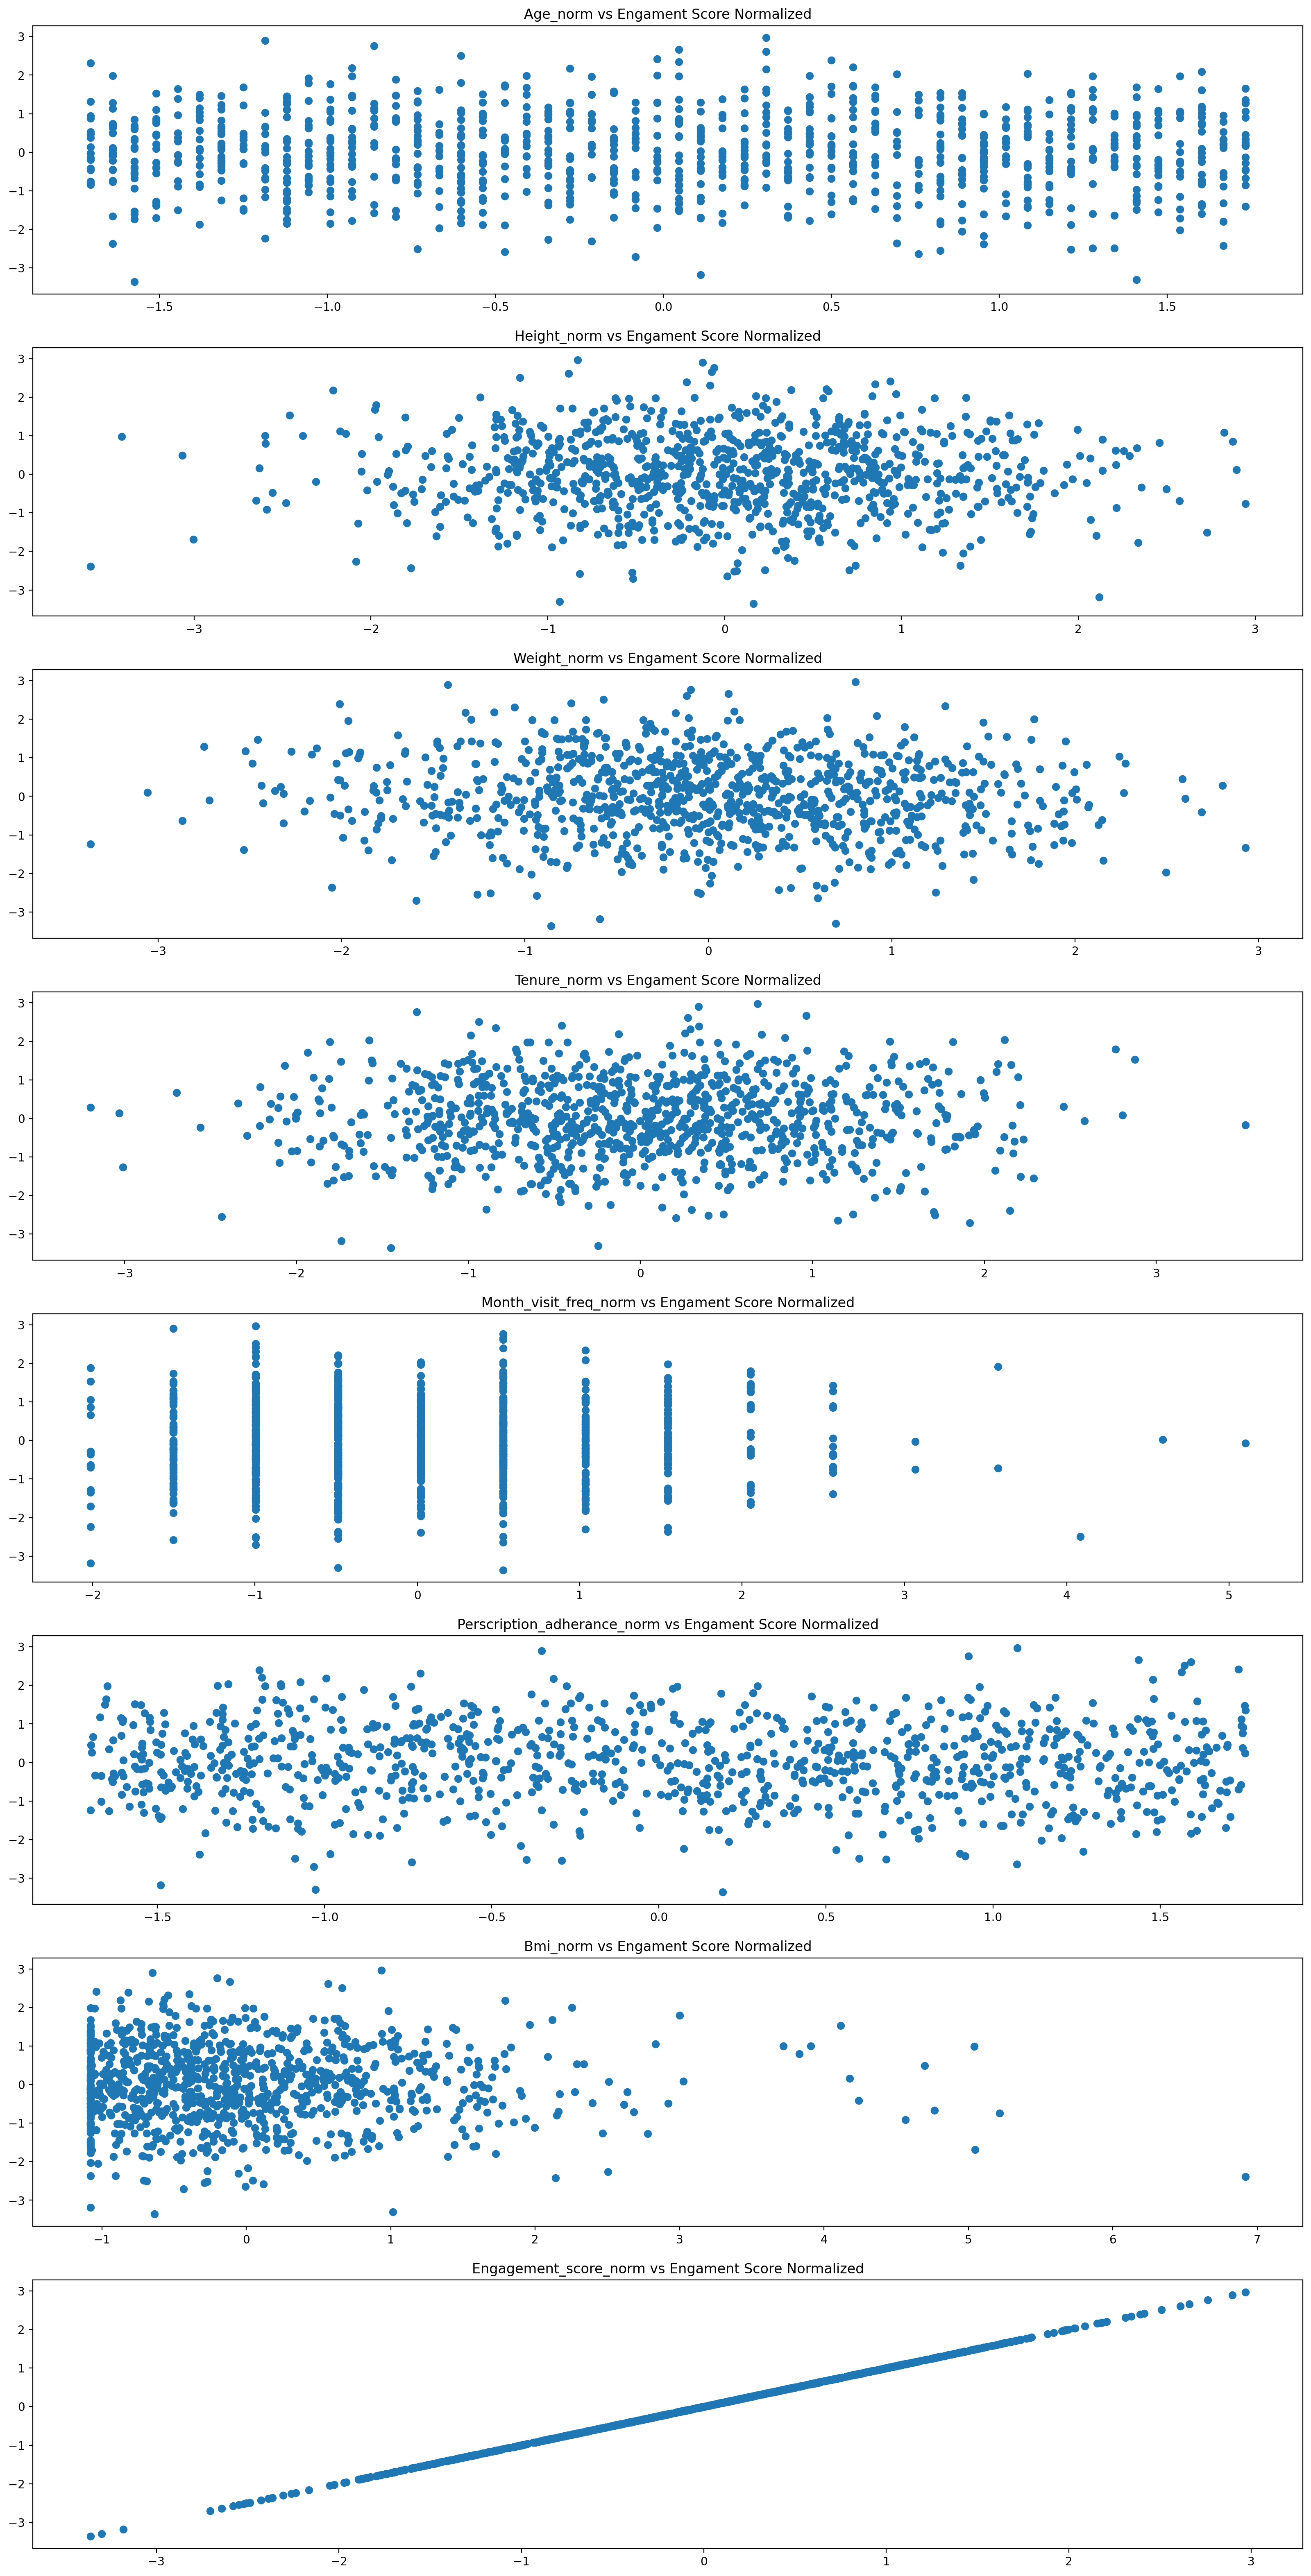

In [183]:
# Initialize  figure
fig, axes = plt.subplots(nrows=len(std_col_names), figsize=(20, 40), dpi=200)

# Iterate over normalized cols
for i, elem in enumerate(std_col_names):
    ax = axes[i]
    
    # Form title
    title = elem.capitalize()
    # Plot Scatterplot
    ax.scatter(result_df[elem], result_df['engagement_score_norm'])
    ax.set_title(f"{title} vs Engament Score Normalized")

In [8]:
import pandas as pd
from scipy.stats import spearmanr

# Sample data: Student scores and their satisfaction levels
data = {
    'Student': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Score': [85, 92, 78, 90, 88],
    'Satisfaction': ['Satisfied', 'Very Satisfied', 'Neutral', 'Dissatisfied', 'Very Satisfied']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define a ranking order for the satisfaction levels
satisfaction_order = {'Very Dissatisfied': 1, 'Dissatisfied': 2, 'Neutral': 3, 'Satisfied': 4, 'Very Satisfied': 5}

# Assign ranks based on satisfaction levels using the defined order
df['Satisfaction_Rank'] = df['Satisfaction'].map(satisfaction_order)

# Display the DataFrame with ranks
print("DataFrame with Ranks:")
print(df)

# Perform Spearman correlation analysis
correlation, p_value = spearmanr(df['Score'], df['Satisfaction_Rank'])

# Display the results
print("\nSpearman Correlation Coefficient:", correlation)
print("P-value:", p_value)


DataFrame with Ranks:
   Student  Score    Satisfaction  Satisfaction_Rank
0    Alice     85       Satisfied                  4
1      Bob     92  Very Satisfied                  5
2  Charlie     78         Neutral                  3
3    David     90    Dissatisfied                  2
4      Eva     88  Very Satisfied                  5

Spearman Correlation Coefficient: 0.30779350562554625
P-value: 0.614384002810333


In [9]:
# Define the continuous data for variables X and Y
data = {
    'X': [10.2, 15.6, 25.4, 35.8, 45.0, 50.2, 65.1, 70.3],
    'Y': [12.5, 18.1, 30.0, 40.5, 42.1, 47.3, 55.4, 65.0]
}

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Calculate Spearman's rank correlation coefficient
spearman_corr, p_value = spearmanr(df['X'], df['Y'])

print(f"Spearman Rank Correlation Coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

Spearman Rank Correlation Coefficient: 1.0
P-value: 0.0


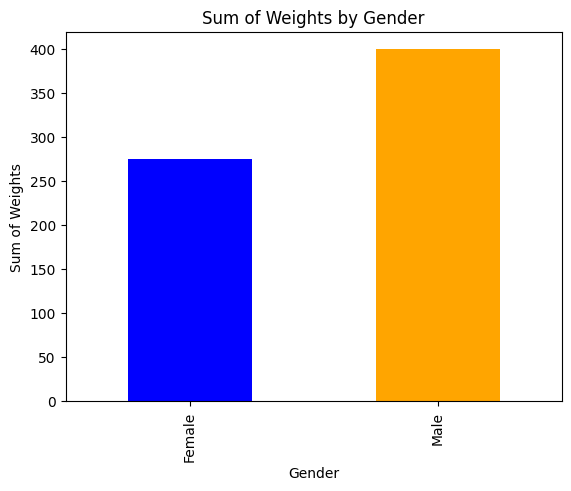

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create synthetic data
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Weight': [70, 60, 75, 65, 80, 55, 90, 50, 85, 45]
}

# Create DataFrame
df = pd.DataFrame(data)

# Group by Gender and calculate sum of weights
grouped_data = df.groupby('Gender')['Weight'].sum()

# Plot directly from the grouped object
grouped_data.plot(kind='bar', color=['blue', 'orange'])

# Add labels and title
plt.title('Sum of Weights by Gender')
plt.xlabel('Gender')
plt.ylabel('Sum of Weights')
plt.show()


In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

# Sample data in a contingency table
data = {
    'Like': [30, 10],  # Male, Female
    'Dislike': [10, 30]
}

# Create a DataFrame
df = pd.DataFrame(data, index=['Male', 'Female'])

print("Contingency Table:")
print(df)

# Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(df)

# Display results
print(f"\nChi-Squared Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


Contingency Table:
        Like  Dislike
Male      30       10
Female    10       30

Chi-Squared Statistic: 18.05
P-Value: 2.1517864378120177e-05
Degrees of Freedom: 1
Expected Frequencies:
[[20. 20.]
 [20. 20.]]


In [14]:
df

Like  Dislike
Male      30       10
Female    10       30

In [15]:
import numpy as np
from scipy.stats import chisquare

# Observed frequencies (counts of colors)
observed = [50, 30, 20]  # Red, Blue, Green

# Expected proportions
expected_proportions = [0.3, 0.5, 0.2]  # 30% Red, 50% Blue, 20% Green
total_marbles = sum(observed)
expected = [p * total_marbles for p in expected_proportions]

# Perform the Chi-Square Goodness-of-Fit Test
chi2_stat, p_value = chisquare(observed, f_exp=expected)

# Display results
print(f"\nChi-Squared Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Expected Frequencies: {expected}")



Chi-Squared Statistic: 21.333333333333336
P-Value: 2.3309101142937e-05
Expected Frequencies: [30.0, 50.0, 20.0]


In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Sample data: Three groups with values
data = {'value': [22, 24, 25, 28, 29, 35, 38, 40, 44, 45],
        'group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C']}

df = pd.DataFrame(data)

# Ordinary Least Squares (OLS) model
model = ols('value ~ group', data=df).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


              sum_sq   df         F    PR(>F)
group     583.916667  2.0  30.92623  0.000335
Residual   66.083333  7.0       NaN       NaN


In [17]:
from statsmodels.stats.proportion import proportions_ztest

# Example: 2 groups with success counts and total observations
successes = [30, 40]  # Number of successes in each group
nobs = [100, 120]  # Number of observations in each group

z_stat, p_value = proportions_ztest(successes, nobs)
print(f"Z-Statistic: {z_stat}, P-Value: {p_value}")


Z-Statistic: -0.5285499781147278, P-Value: 0.5971176684141065


In [18]:
import numpy as np
from scipy import stats

# Example data: Two groups with sample values
group1 = np.array([20, 21, 22, 23, 24])
group2 = np.array([30, 31, 32, 33, 34])

# Two-sample t-test
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: -10.0, P-Value: 8.4881815276285e-06


In [19]:
import numpy as np
from scipy import stats

# Example: Contingency table with observed frequencies
observed = np.array([[50, 30],
                     [20, 10]])

# Chi-square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)
print(f"Chi-Square Statistic: {chi2_stat}, P-Value: {p_value}")


Chi-Square Statistic: 0.033147321428571394, P-Value: 0.8555324543726868
